# Integrating Trajectories using OrdinaryDiffEq.jl
This notebook computes trajectories using the interface defined by OrdinaryDiffEq.jl. It goes over the dynamics functions.

### The first step is to import the ThreeBodyProblem and OrdinaryDiffEq packages. We'll also use Plots. 

In [11]:
@time using ThreeBodyProblem
@time using OrdinaryDiffEq
@time using LinearAlgebra
@time using Plots

  0.000104 seconds (98 allocations: 7.719 KiB)
  0.000083 seconds (98 allocations: 7.703 KiB)
  0.000080 seconds (98 allocations: 7.703 KiB)
  0.000075 seconds (98 allocations: 7.703 KiB)


## Dynamics Equations
ThreeBodyProblem.jl implements the equations of motion for several models, including the Circular Restricted Three-Body Problem (CR3BP), Bicircular Problem (BCP), Restricted Two-Body Problem (R2BP), and Clohessy-Wiltshire (CW). 

### CR3BP
The CR3BP depends on a single parameter, the mass parameter μ. We can compute the time derivative of a state in the rotating frame with the CR3BPdynamics function

In [12]:
μ = 0.1 # arbitrary mass parameter
rv = [0.5, 0, 0, 0, 0.5, 0] # arbitrary state
t = 0 # time at which to evaluate the dynamics
rvdot = CR3BPdynamics(rv, μ, t) # time derivative of initial conditions

6-element Vector{Float64}:
  0.0
  0.5
  0.0
 -0.375
  0.0
 -0.0

We can also give it a vector of paramters p = [μ₁, μ₂, d]

In [13]:
μ₁ = G*EARTH.m # {km^3/s^2} gravitational parameter of Earth
μ₂ = G*MOON.m # {km^3/s^2} gravitational parameter of the Moon
d = MOON.a # {km} distance between Earth and Moon
p = [μ₁, μ₂, d] # parameter vector
rvdot = CR3BPdynamics(rv, p, t) # time derivative of initial conditions

6-element Vector{Float64}:
  0.0
  0.5
  0.0
 -0.018266821881590307
  0.0
 -0.0

But the easiest way is to input a system

In [14]:
sys = earth_moon() # create a CR3BP system of the Earth and Moon
rvdot = CR3BPdynamics(rv, p, t) # initial conditions

6-element Vector{Float64}:
  0.0
  0.5
  0.0
 -0.018266821881590307
  0.0
 -0.0

Note that the CR3BP is autonomous, so time doesn't appear in the equations of motion

In [15]:
CR3BPdynamics(rv, sys, t) == CR3BPdynamics(rv, sys, 10*t) ? "The time derivatives are equal" : "The time derivatives are not equal"

"The time derivatives are equal"

### Other Models
Each model has it's own required inputs

In [16]:
CR3BPinert(rv, sys, t) # CR3BP in the inertial frame (no longer autonomous)

w = [rv;reshape(I(6),36,1)] # initial conditions with the STM
CR3BPstm(w, sys, t) # CR3BP with the STM

sys_bcp = earth_moon_sun() # create a CR3BP system of the Earth, Moon, and Sun
BCPdynamics(rv, sys_bcp, t) # Bicircular Restricted Three Body Problem with the Sun as the Tertiary body



6-element Vector{Float64}:
  0.0
  0.5
  0.0
 -2.209480385153218
  0.0
 -0.0

## Setting up an ODEProblem
We will now create an ODEProblem object that takes our dynamics function, initial condition, time-span, and system as inputs.

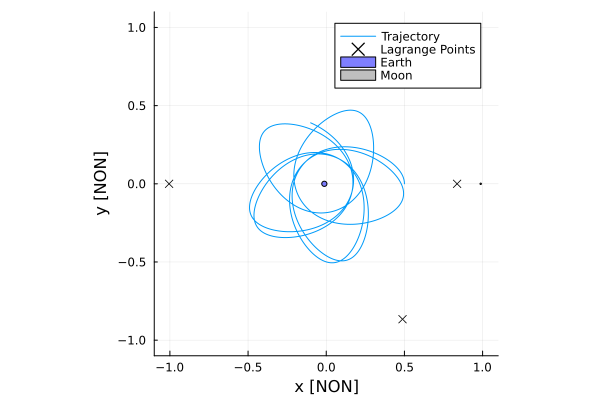

In [17]:
tspan = (0,10) # time span
prob = ODEProblem(CR3BPdynamics!, rv, tspan, sys) # create an ODEProblem
sol = solve(prob, TsitPap8(), reltol=1e-12, abstol=1e-12) # solve the ODEProblem
plot(sol, idxs=(1,2), xlabel="x [NON]", ylabel="y [NON]", label="Trajectory") # plot the solution
plot!(sys, lims=(-1.1,1.1)) # plot the CR3BP system